Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/fjcreate/'

N = 20_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}7/fork_join_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}7/fork_join_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}7/fork_join_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}7/fork_join_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Apr 21 20:27:58 2025 +0200) (507.85ms ela...,3.900,0.0326,0.681,4.84,0.82,73.30,56.57 C,Nominal
1,(Mon Apr 21 20:27:59 2025 +0200) (508.54ms ela...,0.330,0.0673,0.469,0.94,0.22,14.94,56.19 C,Nominal
2,(Mon Apr 21 20:27:59 2025 +0200) (509.63ms ela...,0.320,0.0375,0.421,0.89,0.22,15.10,56.19 C,Nominal
3,(Mon Apr 21 20:28:00 2025 +0200) (508.69ms ela...,1.420,0.0392,0.457,2.04,0.38,28.32,55.77 C,Nominal
4,(Mon Apr 21 20:28:00 2025 +0200) (509.65ms ela...,0.351,0.0274,0.416,0.91,0.23,16.01,55.77 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(2447, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Apr 21 20:28:10 2025 +0200) (1009.57ms el...,40.1,0.0651,1.03,43.48,3.97,99.55,58.16 C,Nominal
1,(Mon Apr 21 20:28:11 2025 +0200) (1005.18ms el...,35.0,0.0574,1.28,38.59,3.68,96.77,61.21 C,Nominal
2,(Mon Apr 21 20:28:12 2025 +0200) (1005.89ms el...,36.6,0.0566,1.38,40.15,3.64,96.60,64.19 C,Nominal
3,(Mon Apr 21 20:28:13 2025 +0200) (1006.04ms el...,35.7,0.0551,1.29,39.23,3.64,97.45,66.53 C,Nominal
4,(Mon Apr 21 20:28:14 2025 +0200) (1006.55ms el...,36.3,0.0700,1.53,40.03,3.74,97.35,68.64 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Apr 21 18:46:56 2025 +0200) (510.15ms ela...,2.860,0.00,0.392,3.21,0.57,46.85,54.54 C,Nominal
1,(Mon Apr 21 18:46:56 2025 +0200) (506.18ms ela...,5.370,0.03,0.515,5.99,1.04,98.65,54.54 C,Nominal
2,(Mon Apr 21 18:46:57 2025 +0200) (508.12ms ela...,0.116,0.00,0.275,0.20,0.05,3.55,54.49 C,Nominal
3,(Mon Apr 21 18:46:57 2025 +0200) (510.14ms ela...,0.156,0.00,0.270,0.27,0.07,5.63,54.49 C,Nominal
4,(Mon Apr 21 18:46:58 2025 +0200) (507.79ms ela...,1.150,0.00,0.303,1.30,0.21,17.42,54.39 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(1535, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Apr 21 18:47:08 2025 +0200) (1009.92ms el...,19.2,0.0,0.934,20.00,2.25,96.28,53.99 C,Nominal
1,(Mon Apr 21 18:47:09 2025 +0200) (1005.95ms el...,16.0,0.0,0.726,16.76,1.89,96.25,55.26 C,Nominal
2,(Mon Apr 21 18:47:10 2025 +0200) (1006.75ms el...,15.9,0.0,0.713,16.61,1.85,95.79,56.27 C,Nominal
3,(Mon Apr 21 18:47:11 2025 +0200) (1006.88ms el...,15.7,0.0,0.715,16.43,1.84,96.56,57.00 C,Nominal
4,(Mon Apr 21 18:47:12 2025 +0200) (1007.14ms el...,16.1,0.0,0.725,16.83,1.88,95.75,57.70 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-21 20:27:58,3.900,0.0326,0.681,4.84,0.82,73.30,56.57,Nominal,507.85
1,2025-04-21 20:27:59,0.330,0.0673,0.469,0.94,0.22,14.94,56.19,Nominal,508.54
2,2025-04-21 20:27:59,0.320,0.0375,0.421,0.89,0.22,15.10,56.19,Nominal,509.63
3,2025-04-21 20:28:00,1.420,0.0392,0.457,2.04,0.38,28.32,55.77,Nominal,508.69
4,2025-04-21 20:28:00,0.351,0.0274,0.416,0.91,0.23,16.01,55.77,Nominal,509.65


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(2447, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-21 20:28:10,40.1,0.0651,1.03,43.48,3.97,99.55,58.16,Nominal,1009.57
1,2025-04-21 20:28:11,35.0,0.0574,1.28,38.59,3.68,96.77,61.21,Nominal,1005.18
2,2025-04-21 20:28:12,36.6,0.0566,1.38,40.15,3.64,96.60,64.19,Nominal,1005.89
3,2025-04-21 20:28:13,35.7,0.0551,1.29,39.23,3.64,97.45,66.53,Nominal,1006.04
4,2025-04-21 20:28:14,36.3,0.0700,1.53,40.03,3.74,97.35,68.64,Nominal,1006.55


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-21 18:46:56,2.860,0.00,0.392,3.21,0.57,46.85,54.54,Nominal,510.15
1,2025-04-21 18:46:56,5.370,0.03,0.515,5.99,1.04,98.65,54.54,Nominal,506.18
2,2025-04-21 18:46:57,0.116,0.00,0.275,0.20,0.05,3.55,54.49,Nominal,508.12
3,2025-04-21 18:46:57,0.156,0.00,0.270,0.27,0.07,5.63,54.49,Nominal,510.14
4,2025-04-21 18:46:58,1.150,0.00,0.303,1.30,0.21,17.42,54.39,Nominal,507.79


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(1535, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-21 18:47:08,19.2,0.0,0.934,20.00,2.25,96.28,53.99,Nominal,1009.92
1,2025-04-21 18:47:09,16.0,0.0,0.726,16.76,1.89,96.25,55.26,Nominal,1005.95
2,2025-04-21 18:47:10,15.9,0.0,0.713,16.61,1.85,95.79,56.27,Nominal,1006.75
3,2025-04-21 18:47:11,15.7,0.0,0.715,16.43,1.84,96.56,57.00,Nominal,1006.88
4,2025-04-21 18:47:12,16.1,0.0,0.725,16.83,1.88,95.75,57.70,Nominal,1007.14


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


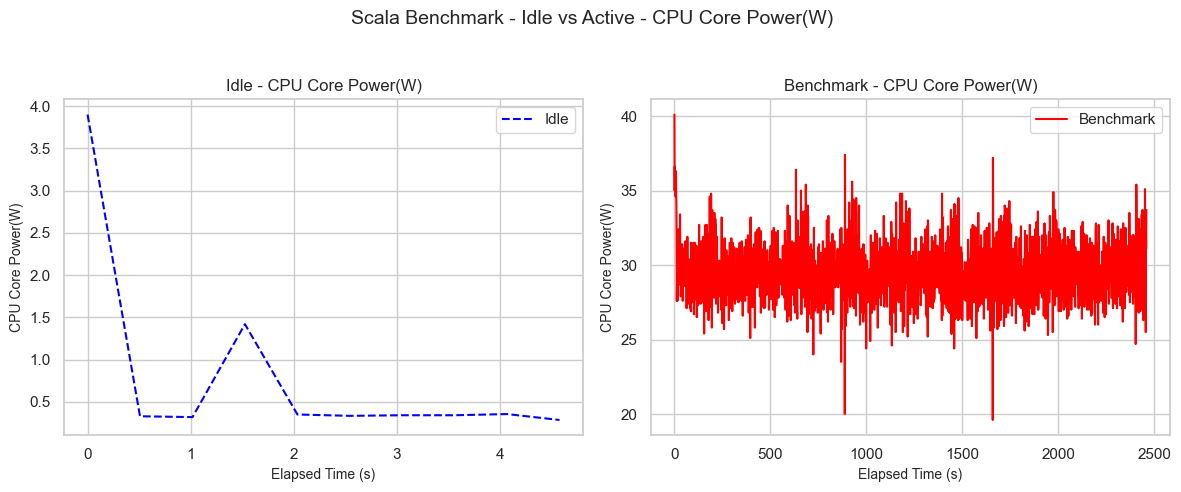

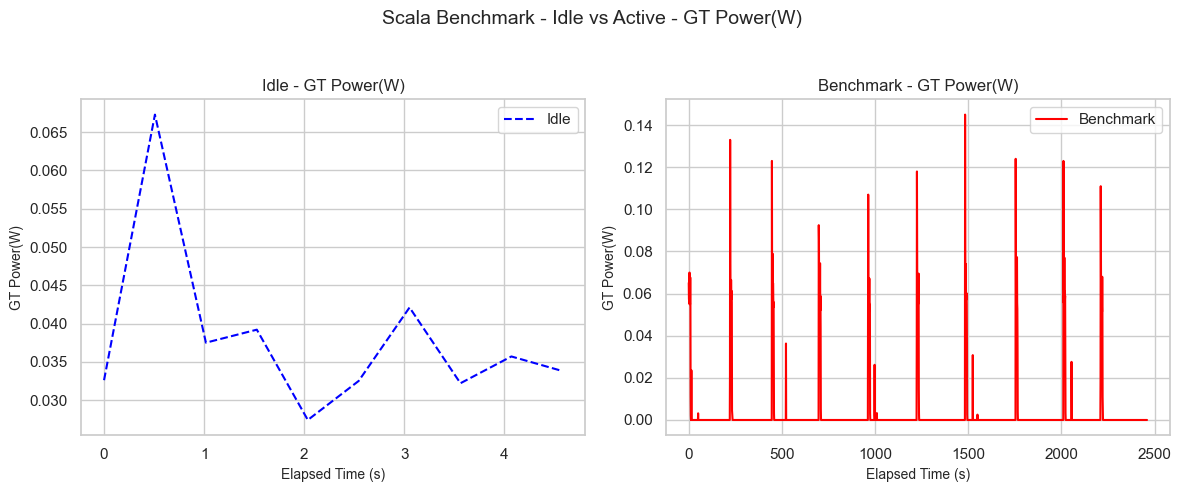

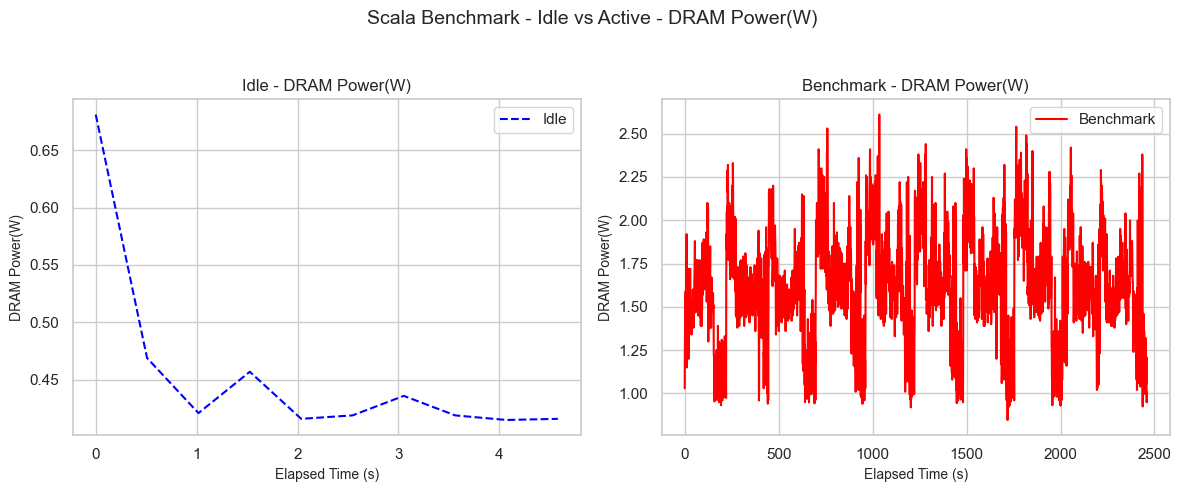

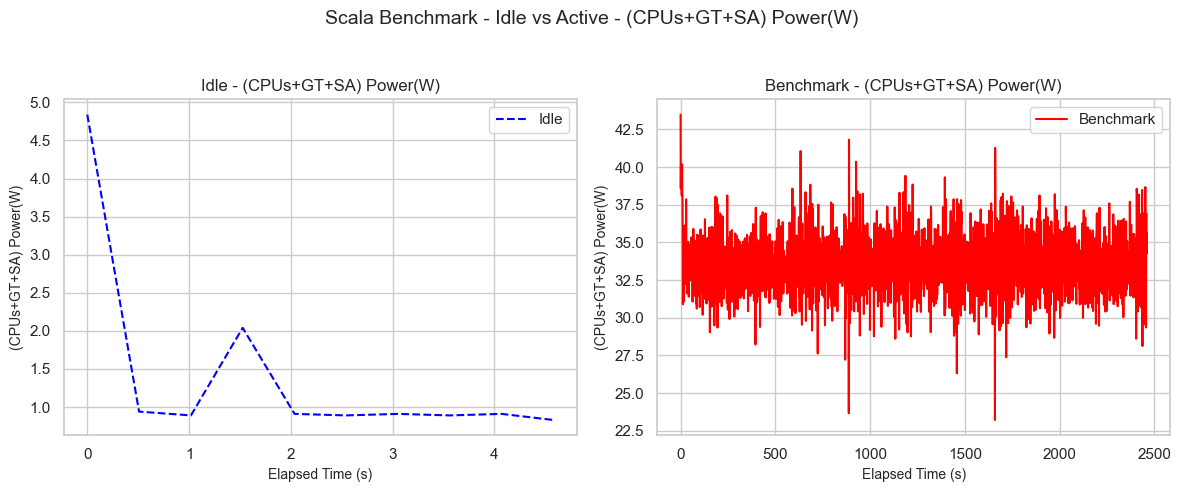

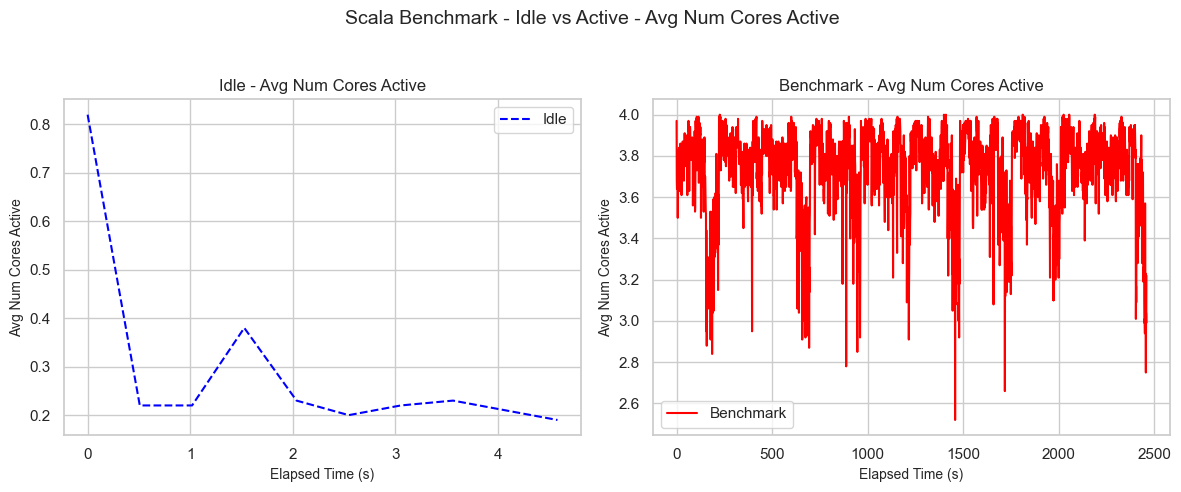

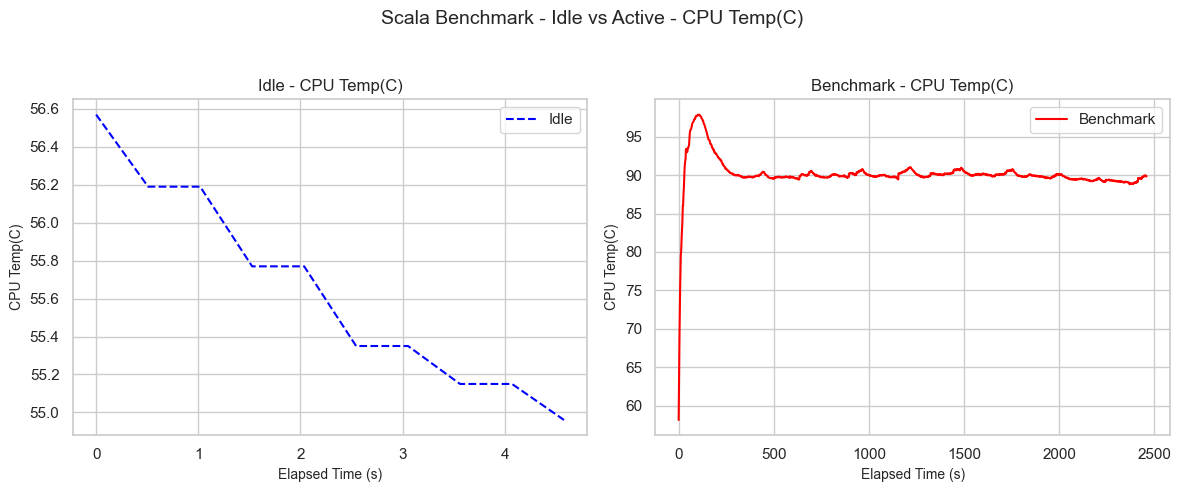

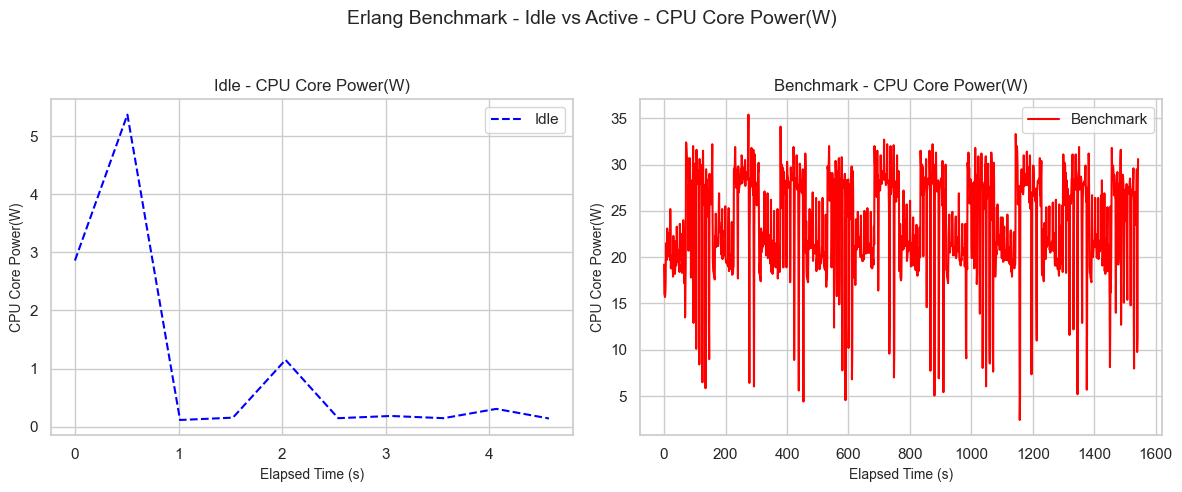

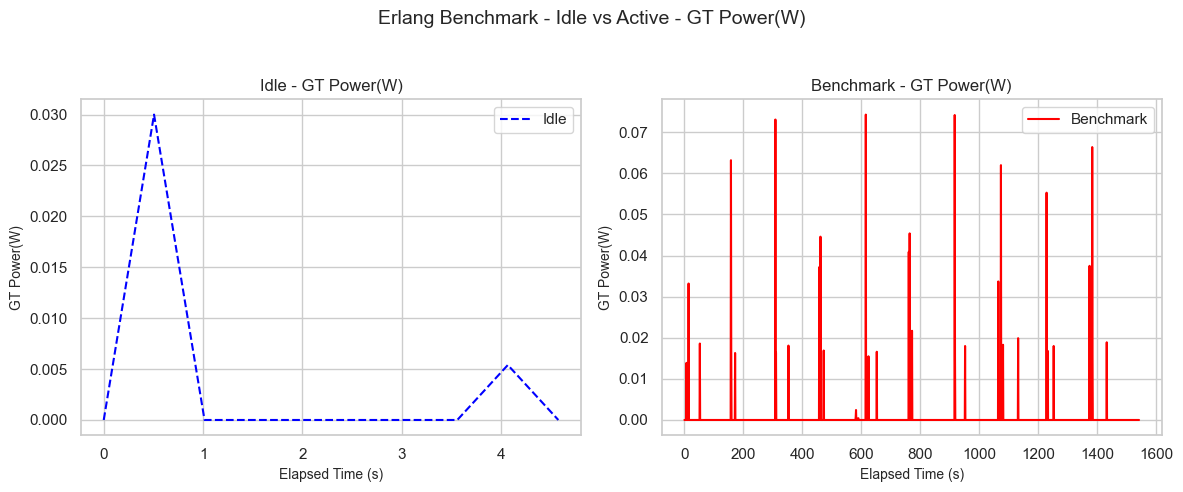

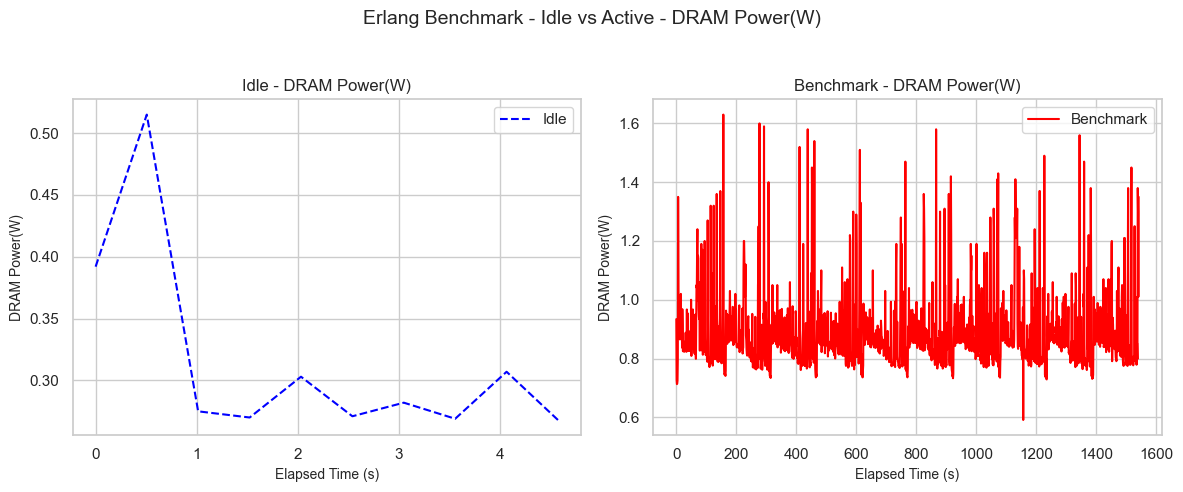

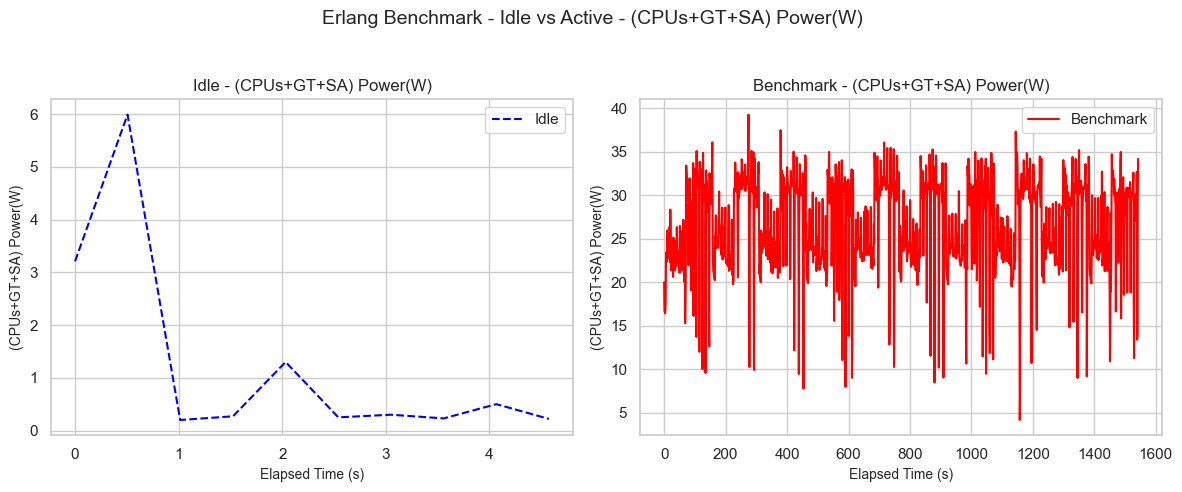

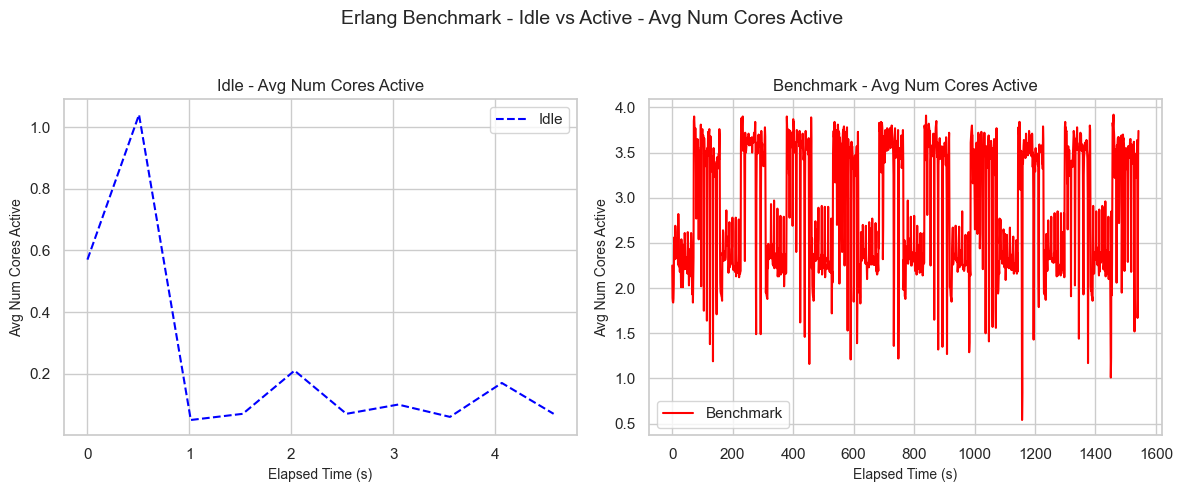

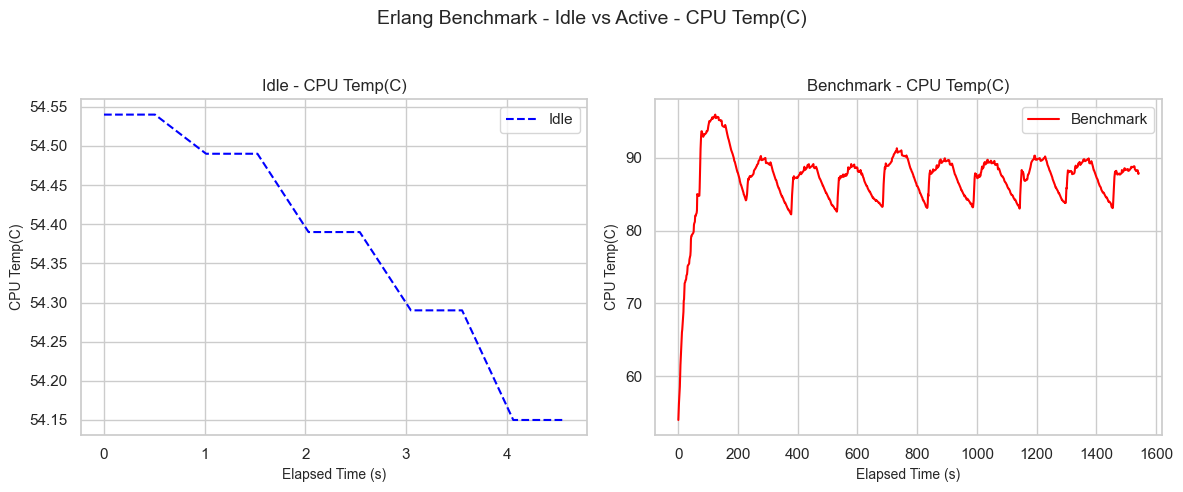

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_message_count(n):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if n >= 1_000_000_000:
        return f"{n // 1_000_000_000}B"
    elif n >= 1_000_000:
        return f"{n // 1_000_000}M"
    elif n >= 1_000:
        return f"{n // 1_000}K"
    return str(n)

message_label = format_message_count(N)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

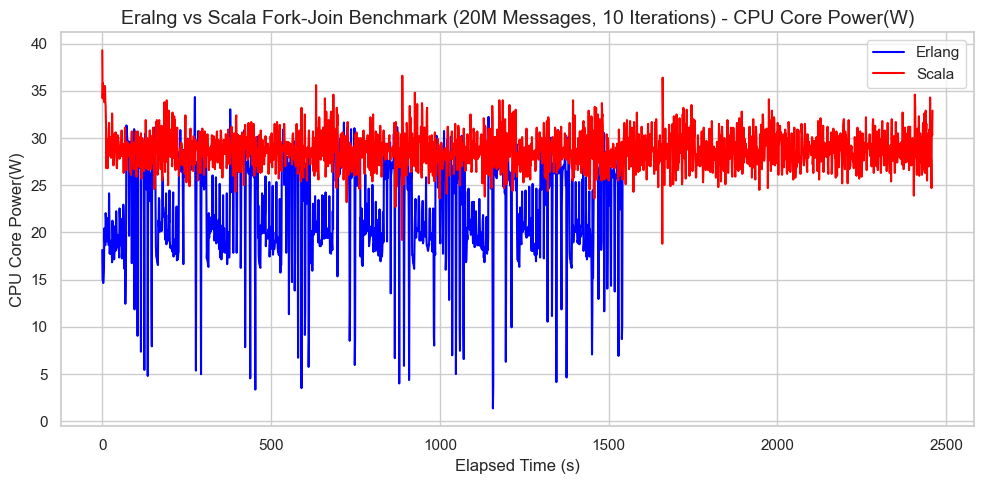

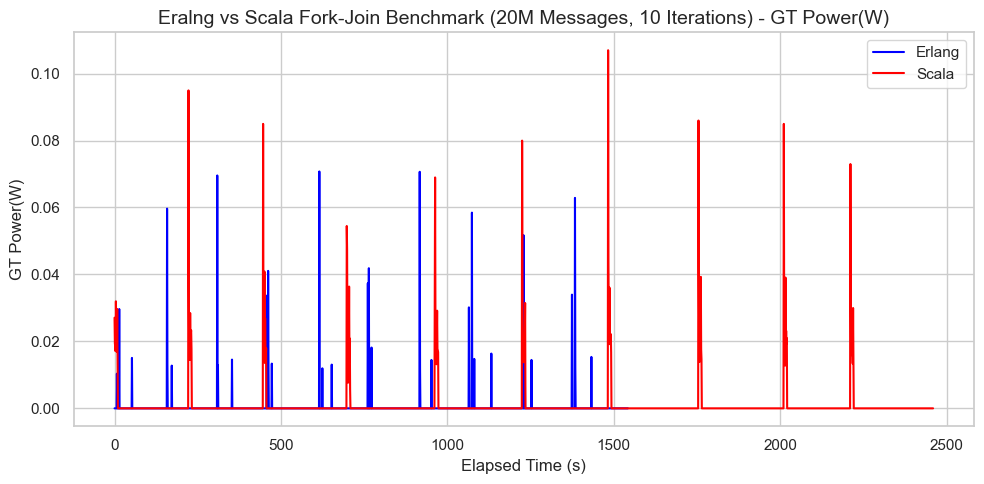

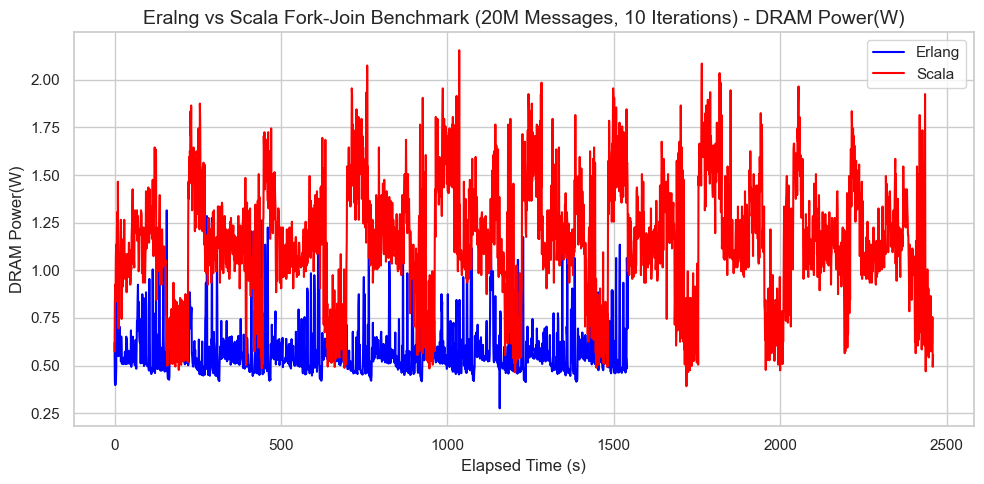

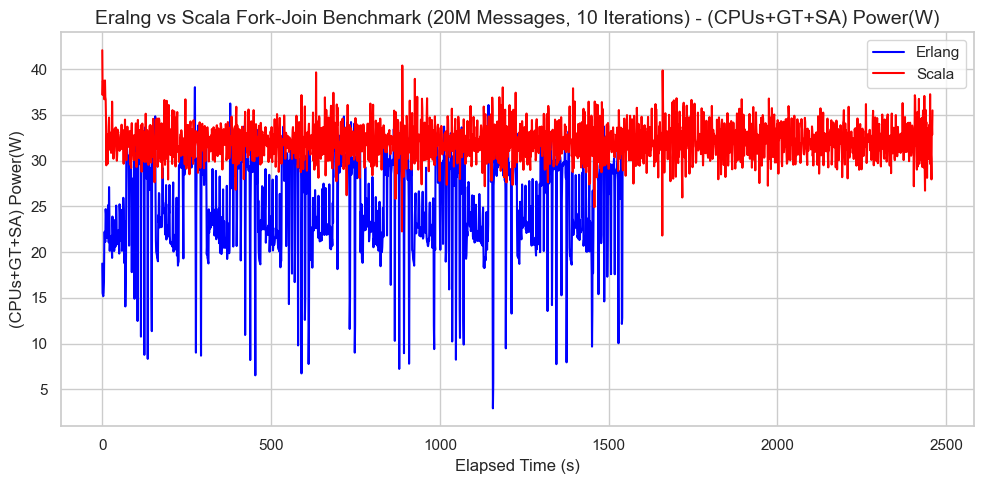

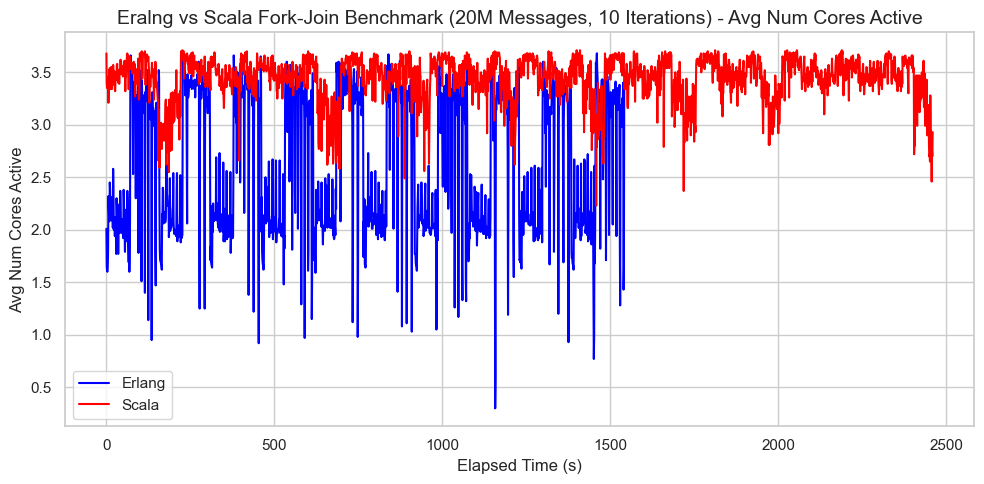

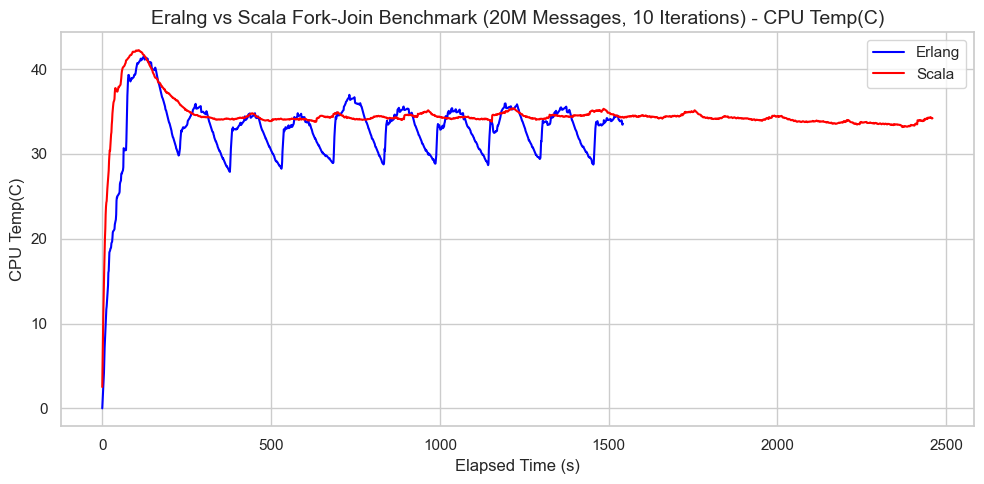

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Fork-Join Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        28.777771
GT Power(W)              -0.035120
DRAM Power(W)             1.156067
(CPUs+GT+SA) Power(W)    32.143852
CPU Temp(C)              34.527521
Avg Num Cores Active      3.441024
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        22.782580
GT Power(W)              -0.002828
DRAM Power(W)             0.572824
(CPUs+GT+SA) Power(W)    25.504980
CPU Temp(C)              32.826879
Avg Num Cores Active      2.653664
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")



Results appended to ../../data/fjcreate/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 73649.201149946 Joules
Erlang Benchmark: 36044.32151647472 Joules
